In [ ]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
df = pd.read_csv('/Users/jz/Downloads/job_data/2/NEW_YORK.csv')

In [3]:
df.loc[df['rating'] == 0,'rating'] = np.nan
df.loc[df['low_salary_year($)'] == 0,'low_salary_year($)'] = np.nan
df.loc[df['high_salary_year($)'] == 0,'high_salary_year($)'] = np.nan
df.loc[df['reviews'] == 0,'reviews'] = np.nan
df.loc[df['datepost'] == 0,'datepost'] = np.nan
df[:10]

,job_title,rating,low_salary_year($),high_salary_year($),company,reviews,location,datepost,skills
0,"Junior Business Analyst, Client Services",NaN,0,0,NaN,NaN,NaN,30.0,"Python, SQL, R"
1,Data Analyst,NaN,0,0,NaN,NaN,NaN,30.0,"SQL, R, Java, Excel, JavaScript, Business Inte..."
2,LIBOR - Project Manager / Business Analyst,4.5,0,0,Prospect 33,2.0,"New York, NY",30.0,R
3,Business Analyst,4.5,0,0,Prospect 33,2.0,"New York, NY",30.0,NaN
4,"Data Analyst, PNA",3.8,0,0,New York City NYC HOUSING AUTHORITY,754.0,"Manhattan, NY",30.0,"R, Excel"
5,Business Analyst,3.4,"65,000","85,000",ThoughtFocus,21.0,"New York, NY 10001",30.0,R
6,Mortgage Data & Collateral Analyst,3.2,0,0,Global Atlantic Financial Group,23.0,"New York, NY",30.0,NaN
7,Data Analyst,4.2,"50,000","60,000",UncommonGoods,174.0,"Brooklyn, NY 11220",30.0,NaN
8,Audience Data Analyst,3.9,0,0,Dow Jones,198.0,"New York, NY 10176",30.0,"Python, SQL, R, Tableau, Linux, Go, CSS, GIS, ..."
9,Data Analyst Intern,3.5,0,0,Chexology,2.0,"New York, NY 10011",30.0,NaN


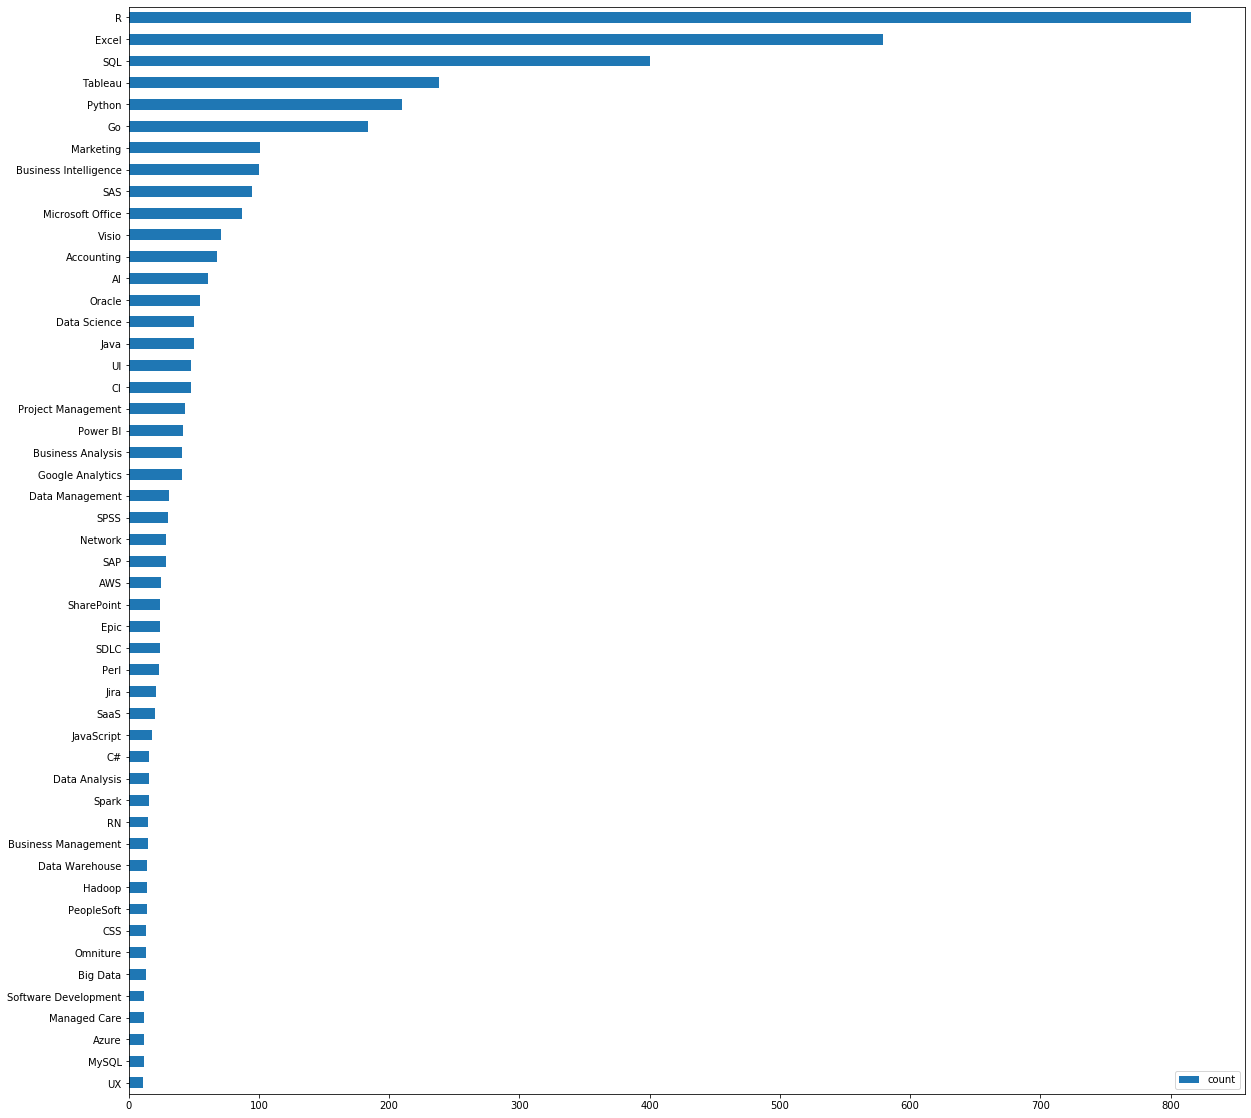

In [4]:
df_noskill = df.drop(['skills'], axis=1)
df_skill = df['skills'].str.get_dummies(sep=', ')
df_skill_rank = df_skill.sum().to_frame(name='count').sort_values(by=['count'], ascending=False)[:50]
df_skill_rank.sort_values(by=['count'], ascending=True).plot.barh(figsize=(20,20))

In [5]:
df_noskill.describe(include='all')

,job_title,rating,low_salary_year($),high_salary_year($),company,reviews,location,datepost
count,1151,491.000000,1151,1151,869,869.000000,869,1121.000000
unique,710,NaN,31,30,410,NaN,90,NaN
top,Business Analyst,NaN,0,0,NYC Health + Hospitals,NaN,"New York, NY",NaN
freq,80,NaN,1094,1099,27,NaN,309,NaN
mean,NaN,3.800000,NaN,NaN,NaN,170.245109,NaN,22.886708
std,NaN,0.415319,NaN,NaN,NaN,255.053732,NaN,10.095995
min,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,3.600000,NaN,NaN,NaN,6.000000,NaN,15.000000
50%,NaN,3.800000,NaN,NaN,NaN,36.000000,NaN,30.000000
75%,NaN,4.000000,NaN,NaN,NaN,234.000000,NaN,30.000000


In [6]:
df_noskill['company']

0                                                     NaN
1                                                     NaN
2                                             Prospect 33
3                                             Prospect 33
4                     New York City NYC HOUSING AUTHORITY
5                                            ThoughtFocus
6                         Global Atlantic Financial Group
7                                           UncommonGoods
8                                               Dow Jones
9                                               Chexology
10                                                    NaN
11                                                    NaN
12                                                  Uline
13                                                 Indeed
14                                     The New York Times
15                                                    NaN
16                          United Federation of Teachers
17            

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="nyc_zip_app")

In [8]:
loc_address = 'Montefiore Medical Center'
location = geolocator.geocode(loc_address)
print((location.latitude, location.longitude))

(51.3396715, 1.42817363327184)


In [9]:
import time
lat = []
lon =[]
for i in df_noskill['company']:
    try:
        location = geolocator.geocode(i)
        time.sleep(1)
        lat.append(location.latitude)
        lon.append(location.longitude)
    except:
        lat.append(np.nan)
        lon.append(np.nan)

In [10]:
df_loc = pd.concat([pd.DataFrame(pd.Series(lat,name='lat')), pd.DataFrame(pd.Series(lat,name='lon'))], axis=1)

In [21]:
df_update = pd.concat([df_noskill, df_loc], axis=1)

In [22]:
len(df_update['job_title'])
df_update['Is_DA'] = np.nan


1151

In [29]:
for i in np.arange(0,1151):
    if 'data' in df_update['job_title'][i].lower():
        df_update['Is_DA'][i] = 1
    else:
        df_update['Is_DA'][i] = 0

/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_update

,job_title,rating,low_salary_year($),high_salary_year($),company,reviews,location,datepost,lat,lon,Is_DA
0,"Junior Business Analyst, Client Services",NaN,0,0,NaN,NaN,NaN,30.0,34.220389,34.220389,0.0
1,Data Analyst,NaN,0,0,NaN,NaN,NaN,30.0,34.220389,34.220389,1.0
2,LIBOR - Project Manager / Business Analyst,4.5,0,0,Prospect 33,2.0,"New York, NY",30.0,37.574917,37.574917,0.0
3,Business Analyst,4.5,0,0,Prospect 33,2.0,"New York, NY",30.0,37.574917,37.574917,0.0
4,"Data Analyst, PNA",3.8,0,0,New York City NYC HOUSING AUTHORITY,754.0,"Manhattan, NY",30.0,NaN,NaN,1.0
5,Business Analyst,3.4,"65,000","85,000",ThoughtFocus,21.0,"New York, NY 10001",30.0,12.301670,12.301670,0.0
6,Mortgage Data & Collateral Analyst,3.2,0,0,Global Atlantic Financial Group,23.0,"New York, NY",30.0,NaN,NaN,1.0
7,Data Analyst,4.2,"50,000","60,000",UncommonGoods,174.0,"Brooklyn, NY 11220",30.0,NaN,NaN,1.0
8,Audience Data Analyst,3.9,0,0,Dow Jones,198.0,"New York, NY 10176",30.0,59.287677,59.287677,1.0
9,Data Analyst Intern,3.5,0,0,Chexology,2.0,"New York, NY 10011",30.0,NaN,NaN,1.0


In [31]:
#df_update.to_csv('df_update.csv')

In [ ]:
#如何求关键词之间的距离（wmd，最好用二维表示）‘共现’
当有python时，其他技能是否唯1
#job_title >> job_type(is data_anal)